In [1]:
pip install spacy networkx matplotlib


     ---------------------------------------- 1.6/1.6 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 187.6/187.6 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 5.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pdfplumber

In [2]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
nlp = spacy.load("en_core_web_sm")

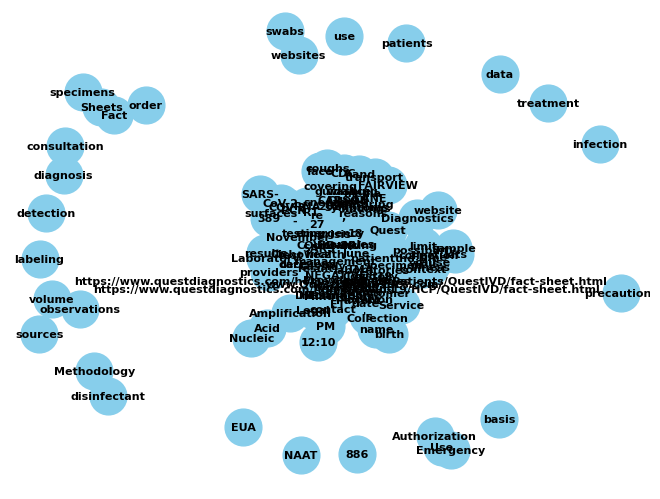

In [12]:
pdf_doc = pdfplumber.open(r'C:\Users\Jahnavi Boya\OneDrive\Desktop\Masters Project\PDF\1.pdf')
text = ''
for single_page in pdf_doc.pages:
    text += single_page.extract_text()

# Process the text with SpaCy
doc = nlp(text)

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for important entities (nouns and named entities)
for token in doc:
    if token.pos_ in ["NOUN", "PROPN"] or token.ent_type_:
        G.add_node(token.text)

for sent in doc.sents:
    for i in range(len(sent) - 1):
        if sent[i].text in G.nodes and sent[i + 1].text in G.nodes:
            G.add_edge(sent[i].text, sent[i + 1].text)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', font_size=8, node_size=700)
plt.show()

Your COVID-19 test result
NEGATIVE
A negative result for this test means that SARS-CoV-2 RNA (the cause of
COVID-19) was not detected in the collection sample.
What does it mean to have a negative test result?
A negative test result does not completely rule out being infected with COVID-19.
If you test negative for COVID-19, this means the virus was not detected at the time your
specimen was collected. It is still possible that you were very early in your infection at the time of
your specimen collection and that you could test positive later.
Also, you could be exposed later and still develop the illness. For all these reasons, it is
important to follow CDC guidance, including but not limited to frequent hand washing, social
distancing, wearing a face covering, covering coughs and sneezes, monitoring symptoms, and
cleaning and disinfectant of frequently touched surfaces - even after a negative test result.
Test information
Patient's name Collection date
Cassidy Cichowicz November 27, 